In [30]:
import scipy.io
import scipy.sparse
import numpy as np

def compute_spgemm(fileA, fileB):
    # Load matrices from .mtx files
    A = scipy.io.mmread(fileA).tocsr()  # Convert to Compressed Sparse Column format
    B = scipy.io.mmread(fileB).tocsc()  # Convert to Compressed Sparse Column format
    # B = np.loadtxt(fileB, delimiter=',')

    # Perform SpGEMM
    C = A.dot(B)
    C = C.toarray().astype(int)
    return C
    # return B

In [31]:
# Example of usage
# C_python = compute_spgemm('/home/ychenfei/research/libs/loops/datasets/chesapeake/chesapeake.mtx','/home/ychenfei/research/libs/loops/examples/spmm/mtx_B.txt')
C_python = compute_spgemm('/home/ychenfei/research/libs/loops/datasets/chesapeake/chesapeake.mtx','/home/ychenfei/research/libs/loops/datasets/chesapeake/chesapeake.mtx')
# C_python = compute_spgemm('/home/ychenfei/research/libs/loops/examples/spgemm/test_A.mtx','/home/ychenfei/research/libs/loops/examples/spgemm/test_A.mtx')
np.set_printoptions(threshold=np.inf)
# print(C_python)
for row in C_python:
    print(' '.join(map(str, row)))

11 9 1 2 3 3 6 5 4 3 3 3 3 1 1 1 1 1 3 2 2 3 3 2 1 2 2 2 1 3 2 3 3 1 8 6 2 5 7
9 11 2 2 2 3 7 6 5 5 4 4 4 2 2 2 2 2 4 3 3 4 4 3 2 3 3 3 2 4 3 4 4 0 9 7 1 5 8
1 2 7 3 1 1 1 1 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 5 5 6 4 5 2 2 3 2 0 1 5 0 0 5
2 2 3 4 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 0 0 1
3 2 1 1 4 2 3 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 0 1 1 2 0 1
3 3 1 1 2 4 2 3 3 2 3 3 3 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 2
6 7 1 1 3 2 10 5 4 4 4 4 4 1 1 1 1 1 3 2 2 5 5 2 1 2 1 1 1 1 1 1 1 1 8 6 2 3 8
5 6 1 1 2 3 5 13 5 3 5 6 6 1 1 1 1 1 2 2 2 5 5 2 2 2 3 3 2 4 3 4 5 1 7 9 2 5 10
4 5 2 2 2 3 4 5 7 4 5 5 5 2 2 2 2 2 2 3 3 5 5 3 2 2 2 2 2 2 2 2 2 0 5 3 1 1 4
3 5 2 2 2 2 4 3 4 5 3 3 3 2 2 2 2 2 2 3 3 4 4 3 2 2 2 2 2 2 2 2 2 0 3 2 1 1 2
3 4 2 2 2 3 4 5 5 3 7 7 6 2 3 3 2 3 2 2 2 5 5 2 2 2 2 2 2 2 2 2 3 1 4 3 2 1 4
3 4 2 2 2 3 4 6 5 3 7 9 7 3 4 3 2 4 3 3 3 6 6 3 3 3 3 3 3 3 3 3 4 1 4 4 2 2 5
3 4 2 2 2 3 4 6 5 3 6 7 7 2 2 2 2 2 3 3 3 6 6 3 3 3 3 3 3 3

In [21]:
def compare_matrices(C_python, txt_file):
    """Compare matrix C computed in Python with matrix from txt/csv file."""
    # Load matrix from txt/csv (from C++)
    C_cpp = np.loadtxt(txt_file, delimiter=',')
    
    # print(C_cpp)

    # Check if the matrices have the same shape
    if C_python.shape != C_cpp.shape:
        print("The matrices have different shapes!")
        return False
    else:
        print("The matrices have same shapes!")

    # # Determine where the matrices differ
    tolerance = 1e-6
    differing_elements = np.where(np.abs(C_python - C_cpp) > tolerance)

    if differing_elements[0].size > 0:
        print("Differences found at the following indices:")
        for i, j in zip(differing_elements[0], differing_elements[1]):
            print(f"Row: {i}, Column: {j}, C_python: {C_python[i,j]}, C_cpp: {C_cpp[i,j]}")
        return False
    else:
        print("The matrices are approximately equal!")
        return True

In [32]:
result = compare_matrices(C_python, '/home/ychenfei/research/libs/loops/examples/spgemm/new_spgemm_result_cuda.txt')

The matrices have same shapes!
The matrices are approximately equal!


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for Operational Intensity and Performance
operational_intensity = np.logspace(0, 3, 100)  # Operational Intensity (x-axis)
performance = np.minimum(10, 2*operational_intensity)  # Performance (y-axis)

# Create the Roofline plot
plt.figure(figsize=(10, 6))
plt.loglog(operational_intensity, performance, label='Roofline')
plt.axhline(y=10, color='r', linestyle='--', label='Peak Performance')
plt.axvline(x=5, color='b', linestyle='--', label='Peak Memory Bandwidth')
plt.legend()
plt.xlabel('Operational Intensity (FLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/s)')
plt.title('Mock Roofline Plot')
plt.grid(True)
plt.show()


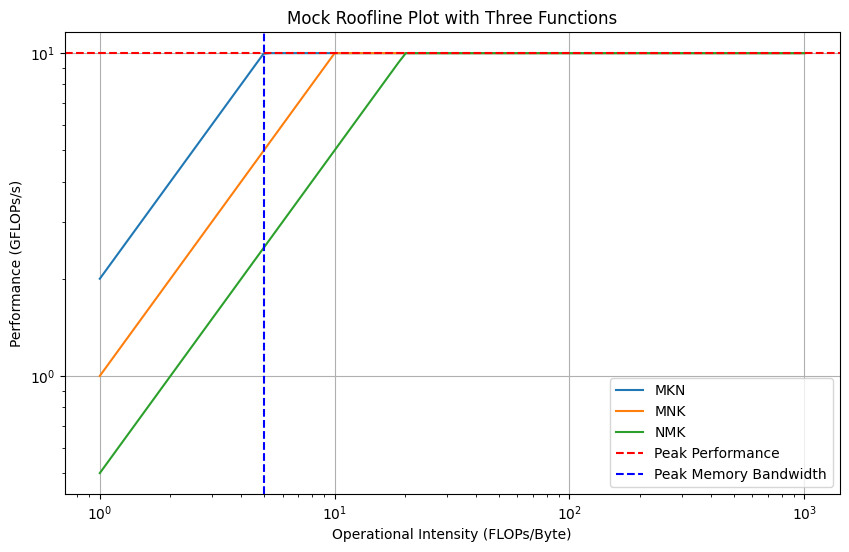

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for Operational Intensity
operational_intensity = np.logspace(0, 3, 100)  # Operational Intensity (x-axis)

# Performance data for three different functions
performance1 = np.minimum(10, 2*operational_intensity)  # Performance for Function 1
performance2 = np.minimum(10, 1*operational_intensity)  # Performance for Function 2
performance3 = np.minimum(10, 0.5*operational_intensity)  # Performance for Function 3

# Create the Roofline plot
plt.figure(figsize=(10, 6))
plt.loglog(operational_intensity, performance1, label='MKN')
plt.loglog(operational_intensity, performance2, label='MNK')
plt.loglog(operational_intensity, performance3, label='NMK')
plt.axhline(y=10, color='r', linestyle='--', label='Peak Performance')
plt.axvline(x=5, color='b', linestyle='--', label='Peak Memory Bandwidth')
plt.legend()
plt.xlabel('Operational Intensity (FLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/s)')
plt.title('Mock Roofline Plot with Three Functions')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the operational intensity range (x-axis)
operational_intensity = np.logspace(0, 3, 100)  # Operational Intensity (x-axis)

# Define parameters for three different functions
params = [(10, 5), (20, 10), (30, 15)]  # Each tuple contains (Peak Performance, Peak Memory Bandwidth)

# Create the Roofline plot
plt.figure(figsize=(10, 6))

# Plot each function on the Roofline plot
for i, (peak_performance, peak_bandwidth) in enumerate(params, 1):
    performance = np.minimum(peak_performance, peak_bandwidth*operational_intensity)
    plt.loglog(operational_intensity, performance, label=f'Function {i}')

    # Plot horizontal and vertical lines representing the peak performance and peak memory bandwidth
    plt.axhline(y=peak_performance, color=f'C{i-1}', linestyle='--')
    plt.axvline(x=peak_performance/peak_bandwidth, color=f'C{i-1}', linestyle='--')

# Add labels, legend, and grid
plt.legend()
plt.xlabel('Operational Intensity (FLOPs/Byte)')
plt.ylabel('Performance (GFLOPs/s)')
plt.title('Mock Roofline Plot with 3 Functions')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
matrix_labels = [
    'matrix1(A)', 'matrix1(B)', 'matrix1(C)',
    'matrix2(A)', 'matrix2(B)', 'matrix2(C)'
]
reuse_distance_labels = [
    "M_N_K_Reuse_Dist", "M_K_N_Reuse_Dist", "K_M_N_Reuse_Dist",
    "K_N_M_Reuse_Dist", "N_M_K_Reuse_Dist", "N_K_M_Reuse_Dist"
]
# Example data (reuse distances for each label for each matrix)
data = np.random.rand(6, 6)  # Replace with your actual data

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define the width of the bars and the positions of the bar groups
bar_width = 0.1
bar_positions = np.arange(len(matrix_labels))

# Create the bar groups for each matrix label
for i, label in enumerate(reuse_distance_labels):
    ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=label)

# Configure the x-axis and y-axis labels, title, and legend
ax.set_xlabel('Coefficient of Row Variation')
ax.set_ylabel('Reuse Distance')
ax.set_title('Reuse Distance by Coefficient of Row Variation')
ax.set_xticks(bar_positions + bar_width * 2.5)
ax.set_xticklabels(matrix_labels)
ax.legend()

# Display the chart
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
matrix_labels = [
    'matrix1(A)', 'matrix1(B)', 'matrix1(C)',
    'matrix2(A)', 'matrix2(B)', 'matrix2(C)'
]
reuse_distance_labels = [
    "M_N_K", "M_K_N", "K_M_N",
    "K_N_M", "N_M_K", "N_K_M"
]
# Example data (reuse distances for each label for each matrix)
data = np.random.rand(6, 6)  # Replace with your actual data

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define the width of the bars and the positions of the bar groups
bar_width = 0.1
bar_positions = np.arange(len(matrix_labels))

# Create the bar groups for each matrix label
for i, label in enumerate(reuse_distance_labels):
    ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=label)

# Configure the x-axis and y-axis labels, title, and legend
ax.set_xlabel(' Matrices ordered by coefficient of row variation')
ax.set_ylabel('Reuse Distance')
ax.set_title('Reuse Distance by Matrices')
ax.set_xticks(bar_positions + bar_width * 2.5)
ax.set_xticklabels(matrix_labels)
ax.legend()

# Display the chart
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create more randomness in the function shapes
def random_curve(x):
    curve_values = np.sin(x + np.random.rand()) * np.random.rand(len(x)) + np.random.rand(len(x))
    min_value = np.min(curve_values)
    return curve_values + (1 - min_value + 0.1) # 0.1 added to ensure it's strictly greater than 1

# Generate data
x = np.linspace(1, 4, 6)
curves = [random_curve(x) for _ in range(6)]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the random curves with markers
marker_shapes = ['o', 'x', 's', '^', '*', '+']
labels = ['MNK', 'MKN', 'KMN', 'KNM', 'NMK', 'NKM']

for i, (curve, marker, label) in enumerate(zip(curves, marker_shapes, labels)):
    ax.plot(x, curve, label=label, marker=marker, linestyle='--')

# Annotate the graph
ax.set_xlabel('Matrices ordered by nnz')
ax.set_ylabel('Compression ratio')
ax.set_title('SpGEMM Performance Analysis')
ax.set_xticks(x)
ax.set_xticklabels(['mtx1', 'mtx2', 'mtx3', 'mtx4', 'mtx5', 'mtx6'])
ax.legend()
ax.set_ylim(bottom=1)

# Display the graph
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points for each label
num_points = 20
labels = ['MKN', 'MNK', 'NMK', 'NKM', 'KMN', 'KNM']
markers = ['o', 'x', 's', '^', '*', '+']
data = {label: (np.random.rand(num_points) + i*0.2, np.random.rand(num_points) + i*0.2) 
        for i, label in enumerate(labels)}

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data points with their respective markers
for label, marker in zip(labels, markers):
    x_data, y_data = data[label]
    ax.scatter(x_data, y_data, label=label, marker=marker, s=50)

# Annotate the graph
ax.set_xlabel('Coefficient of row variation')
ax.set_ylabel('Running time')
ax.set_title('Clustering Analysis')
ax.legend()

# Display the graph
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
matrix_labels = [
    'matrix1(A) #of reads', 'matrix1(B)#of reads', 'matrix1(C)#of writes',
    'matrix2(A)#of reads', 'matrix2(B)#of reads', 'matrix2(C)#of writes'
]
reuse_distance_labels = [
    "M_N_K", "M_K_N", "K_M_N",
    "K_N_M", "N_M_K", "N_K_M"
]
# Example data (reuse distances for each label for each matrix)
data = np.random.rand(6, 6)  # Replace with your actual data

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Define the width of the bars and the positions of the bar groups
bar_width = 0.1
bar_positions = np.arange(len(matrix_labels))

# Create the bar groups for each matrix label
for i, label in enumerate(reuse_distance_labels):
    ax.bar(bar_positions + i * bar_width, data[:, i], width=bar_width, label=label)

# Configure the x-axis and y-axis labels, title, and legend
ax.set_xlabel('Matrices ordered by coefficient of row variation')
ax.set_ylabel('The number of memory access')
ax.set_title('The number of memory access by Matrices')
ax.set_xticks(bar_positions + bar_width * 2.5)
ax.set_xticklabels(matrix_labels)
ax.legend()

# Display the chart
plt.show()
